In [55]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

##import libraries for ANN

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.models import Sequential

In [56]:
## warning 
import warnings 
warnings.filterwarnings('ignore')

In [57]:
## load the dataset
concharity = pd.read_csv('country-data.csv')
concharity

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
2,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
4,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
162,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
163,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
164,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
165,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [58]:
## finding blanks(nulls)
concharity.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [59]:
## removing the duplicates
concharity.drop_duplicates()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
2,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
4,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
162,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
163,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
164,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
165,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600



## The dataset is clean, there is no Blank and No Duplicated items in this dataset
~~ Describing it, finding mean, median..is not very helpful for unsupervised machine learning

*** Our target, the dependent feature, is country and other features are our independent, x
The dependent feature is in string therefore we need to use Label-encoder 

In [60]:
## Apply one-hot encoding to the numerical labels using OneHotEncoder
##onehot_encoder = OneHotEncoder(sparse=False)
##y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))
##Y = y_onehot

## Heirarchy Algorithm-----------------

##Dropping the name of countries as we don't need them--the rest of data is numerical

In [61]:
print(concharity.columns)


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [62]:
# removing the countries names
X =concharity.drop("country",axis=1)
X.head()
#


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
1,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
2,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897
3,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
4,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708


In [63]:
## Normalize the data
X_norm = normalize(X)
X_norm = pd.DataFrame(X_norm, columns = X.columns)
X_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.125725,0.009248,0.004177,0.039108,0.906672,0.003294,0.019403,0.002013,0.400144
1,0.123509,0.012968,0.010112,0.026632,0.941757,0.013277,0.042456,0.004014,0.308001
2,0.070255,0.017236,0.002122,0.020374,0.903949,0.002993,0.026463,0.003087,0.420125
3,0.148055,0.011725,0.003955,0.026332,0.882368,0.001997,0.047199,0.005177,0.443171
4,0.068310,0.011368,0.002483,0.017501,0.932403,0.002179,0.029667,0.003266,0.353017


In [64]:
## dendrogram and create subset
subset_data =X_norm.sample(n = 10)
subset_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
75,0.001465,0.003192,0.000426,0.002335,0.863322,0.000438,0.004274,0.000153,0.504618
35,0.010885,0.014496,0.000419,0.009318,0.884090,0.003526,0.010289,0.000843,0.466745
41,0.023352,0.007771,0.001783,0.012614,0.931062,0.000785,0.023577,0.001641,0.363039
146,0.000048,0.000688,0.000124,0.000573,0.596898,0.000003,0.000884,0.000016,0.802316
67,0.002854,0.002089,0.000457,0.002609,0.966914,0.000990,0.006914,0.000313,0.254967
155,0.000110,0.000847,0.000312,0.001059,0.770536,0.000018,0.002261,0.000039,0.637392
81,0.001081,0.000584,0.000492,0.000644,0.791398,0.000459,0.004050,0.000098,0.611286
147,0.000067,0.000805,0.000173,0.000750,0.677497,0.000014,0.001262,0.000023,0.735523
77,0.000975,0.002004,0.000195,0.001356,0.911489,0.000884,0.003102,0.000118,0.411304
71,0.003201,0.005728,0.000667,0.006954,0.945613,0.004808,0.008119,0.000324,0.325016


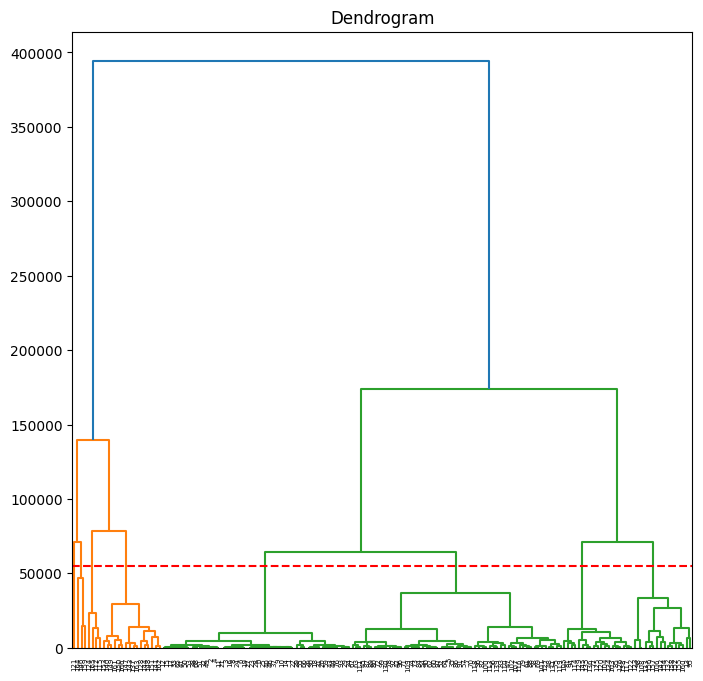

In [65]:
plt.figure(figsize=(8,8))  
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=55000, color = 'r', linestyle = '--') ## make the cut the dendrogram
plt.show()

In [66]:
## cluster---# Fit the model to the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage= 'ward')
y_predicted = cluster.fit_predict(X_norm)

In [67]:
X_norm['cluster']= y_predicted
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1], dtype=int64)

In [68]:
## pca ----dimensionally reduction
pca = PCA(n_components=3)
new_X= pca.fit_transform(X_norm)
new_X

array([[-6.37226788e-01, -1.73976740e-02,  9.42739621e-02],
       [-6.49615079e-01, -1.12066888e-01,  9.66874138e-02],
       [-6.34103534e-01,  1.54528229e-03,  4.52005049e-02],
       [-6.31445118e-01,  3.02810085e-02,  1.20849241e-01],
       [-6.43193369e-01, -6.87691461e-02,  4.14010034e-02],
       [-6.34549060e-01, -7.10936465e-03, -7.81057382e-03],
       [-6.39239824e-01, -2.91498289e-02,  1.29376112e-01],
       [ 1.36368472e+00, -1.46633666e-01,  1.64273757e-02],
       [-6.27799170e-01,  6.42971675e-02,  1.72402223e-01],
       [-6.40810234e-01, -4.94618341e-02,  5.13288078e-02],
       [-6.41753237e-01, -5.65572299e-02,  5.29736989e-02],
       [-6.38990924e-01, -3.73830081e-02,  3.28255153e-02],
       [-6.34761970e-01, -6.83393002e-03,  1.25266937e-02],
       [-6.28559807e-01,  3.71263564e-02, -2.90525275e-02],
       [-6.26465448e-01,  6.29546173e-02,  6.65721381e-02],
       [-6.30695606e-01,  2.42706402e-02,  8.93923304e-03],
       [-6.35688526e-01, -5.91891065e-03

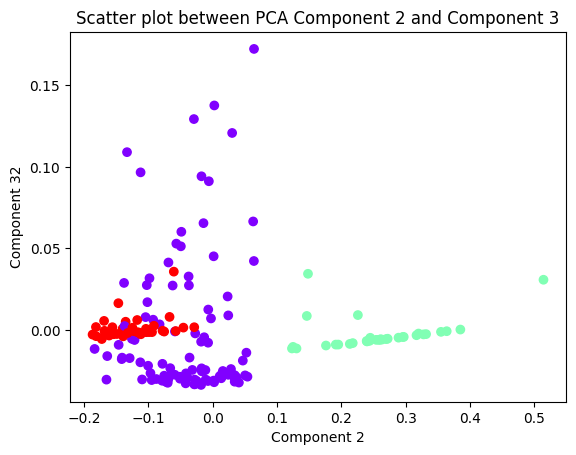

In [69]:
## scatter plot---use index 0 and 1 to grab the index
plt.scatter(new_X[:,1], new_X[:,2], c= cluster.labels_, cmap= 'rainbow')
plt.title('Scatter plot between PCA Component 2 and Component 3')
plt.xlabel('Component 2')
plt.ylabel('Component 32')
plt.show()
plt.show()

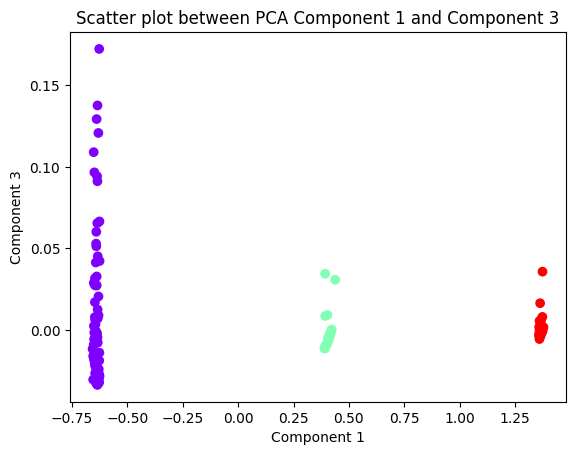

In [70]:
plt.scatter(new_X[:,0], new_X[:,2], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot between PCA Component 1 and Component 3')
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.show()

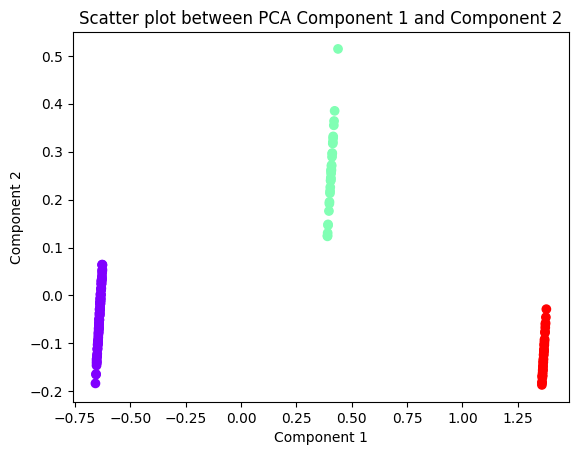

In [71]:
plt.scatter(new_X[:,0], new_X[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter plot between PCA Component 1 and Component 2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [72]:
import pandas as pd

# "country" is a column I dropped from the original dataset
country_column = concharity["country"]

# Create a new DataFrame "df" with "country" and "new_X"
#df = pd.DataFrame({"country": country_column, "PCA_Component_1": new_X[:, 0], "PCA_Component_2": new_X[:, 1], "PCA_Component_3": new_X[:, 2]})
df = pd.DataFrame({"country": country_column, "y_predicted": y_predicted})

df

,country,y_predicted
0,Haiti,0
1,Sierra Leone,0
2,Chad,0
3,Central African Republic,0
4,Mali,0
...,...,...
162,Sweden,1
163,Finland,1
164,Luxembourg,1
165,Singapore,2


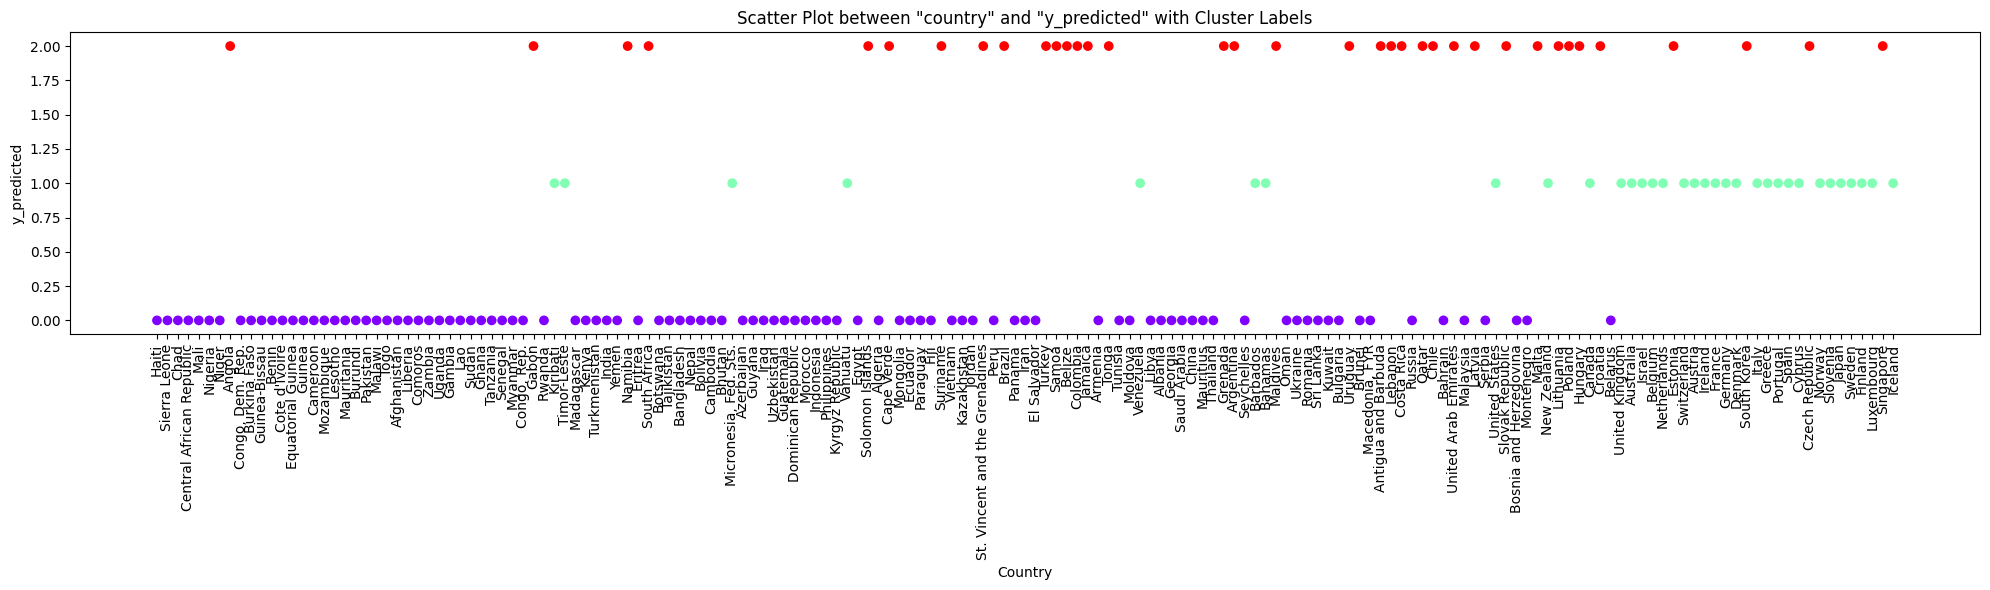

In [73]:
import matplotlib.pyplot as plt

# Assuming we have a DataFrame named df, new name
plt.figure(figsize=(20, 6))
plt.scatter(df['country'], df['y_predicted'], c=cluster.labels_, cmap='rainbow')
plt.title('Scatter Plot between "country" and "y_predicted" with Cluster Labels')
plt.xlabel('Country')
plt.ylabel('y_predicted')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


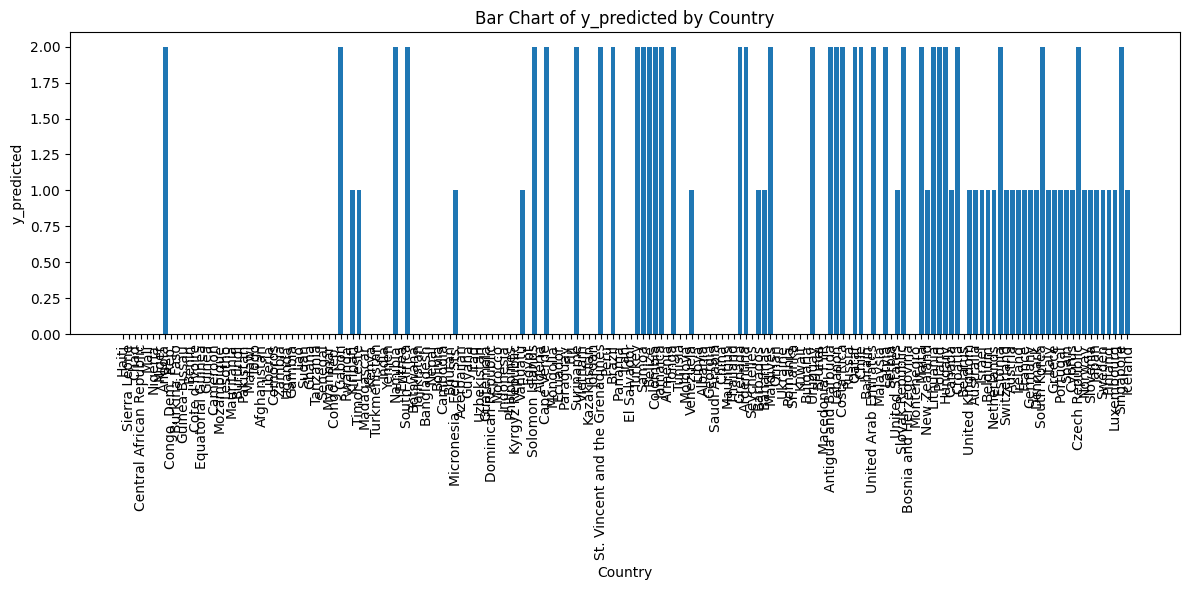

In [74]:
import matplotlib.pyplot as plt

# Our dataframe is df
plt.figure(figsize=(12, 6))
plt.bar(df['country'], df['y_predicted'])
plt.xlabel('Country')
plt.ylabel('y_predicted')
plt.title('Bar Chart of y_predicted by Country')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## K-MEANS Algorithm


In [75]:
## load the dataset and name it as data, just want to be different from above analysing
data = pd.read_csv('country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399
2,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446
4,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708
...,...,...,...,...,...,...,...,...,...,...
162,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
163,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
164,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
165,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [76]:
## Dropping the column 'country ' from our data and name the new data as X
X=data.drop('country', axis=1)


In [77]:
# Scale the features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Health')

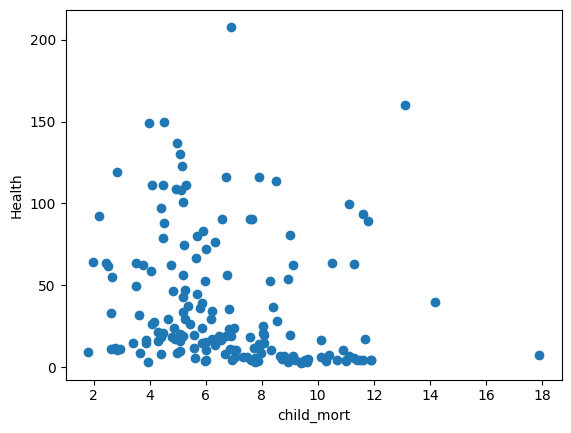

In [78]:
## Plot the scatter plot to see how data to be ploted, how our cluster is 
plt.scatter(data['health'], data['child_mort'])
plt.xlabel('child_mort')
plt.ylabel('Health')

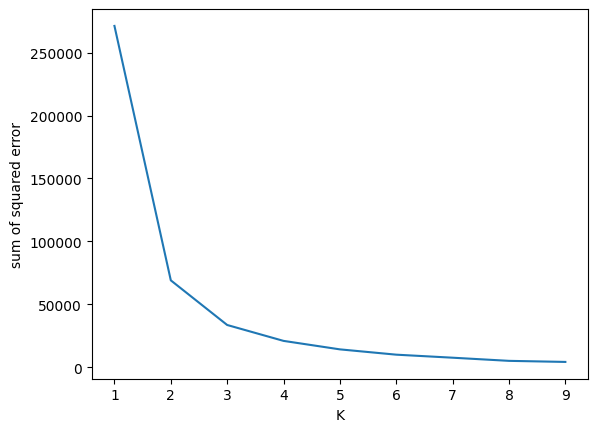

In [79]:
##Finding the optimum number of clusters 
elb_plot = []
k_rnge = range(1,10)
for k in k_rnge:
    km = KMeans(n_clusters=k)
    km.fit(data[['child_mort', 'health']])
    elb_plot.append(km.inertia_)
    
 ## plot the elbow chart
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rnge,elb_plot)   

In [80]:
## Create a K-Means model with the chosen K, for example we choose k=3 which is the number of clusters
# #the number of clusters3( the point that the curve starting to be flat)
# kmeans = KMeans(n_clusters=K, random_state=0)
kmeans = KMeans(n_clusters=3, random_state=0)

In [81]:
##Fit the model to the scaled data
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [82]:
# Get cluster assignments
cluster_assignments = kmeans.labels_

# Add cluster assignments back to the original data
data['cluster'] = cluster_assignments

## Child_mort and Health

In [83]:

y_predicted = km.fit_predict(data[['child_mort', 'health']])
y_predicted

array([4, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
data['clusters'] = y_predicted
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,clusters
0,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,0,4
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,0,6
2,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,0,6
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0,6
4,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,1,2
163,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,2
164,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,2
165,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,2


In [85]:
## centroid
km.cluster_centers_

array([[ 34.64117647,   6.10941176],
       [115.27272727,   5.47      ],
       [  6.31551724,   8.19896552],
       [ 78.08571429,   6.08714286],
       [208.        ,   6.91      ],
       [ 58.1       ,   5.5515    ],
       [149.        ,   6.6475    ],
       [ 18.53846154,   6.12461538],
       [ 93.23      ,   7.265     ]])

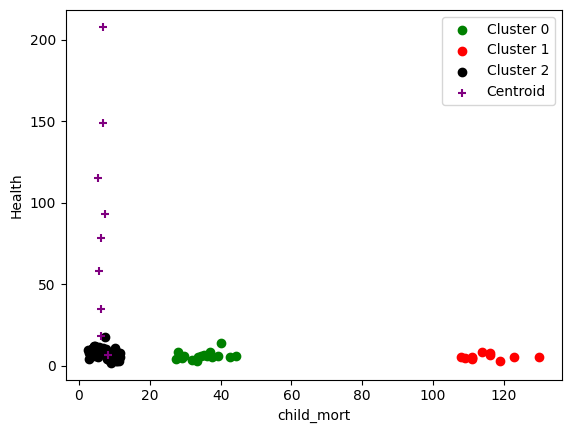

In [86]:
# Now we have clusters named 0, 1, and 2
data1 = data[data.clusters == 0]
data2 = data[data.clusters == 1]
data3 = data[data.clusters == 2]

plt.scatter(data1.iloc[:, 1], data1.iloc[:, 3], color='green', label='Cluster 0')
plt.scatter(data2.iloc[:, 1], data2.iloc[:, 3], color='red', label='Cluster 1')
plt.scatter(data3.iloc[:, 1], data3.iloc[:, 3], color='black', label='Cluster 2')


# Now "km" is our KMeans model
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], color='purple', marker='+', label='Centroid')
plt.xlabel('child_mort')
plt.ylabel('Health')
plt.legend()
plt.show()


In [87]:
## model evaluation
print('WCSS: ', km.inertia_)

WCSS:  4167.744632392638


## Health and Life_Expectation

Text(0, 0.5, 'Health')

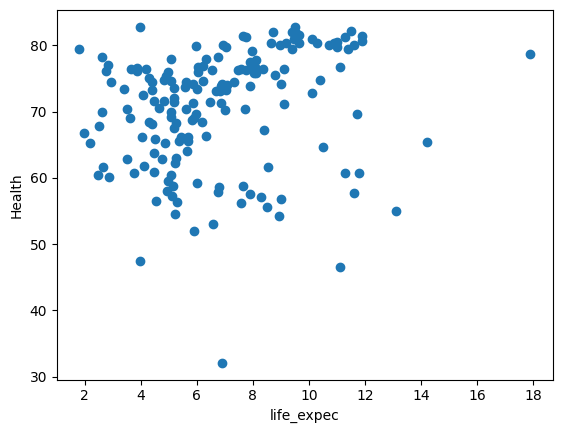

In [88]:
## Plot the scatter plot to see how data to be ploted, how our cluster is 
plt.scatter(data['health'], data['life_expec'])
plt.xlabel('life_expec')
plt.ylabel('Health')


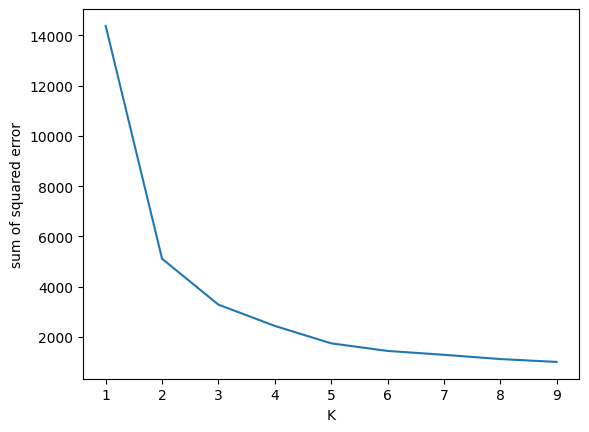

In [89]:

## elbow plot 
elb_plot = []
k_rnge = range(1,10)
for k in k_rnge:
    km = KMeans(n_clusters=k)
    km.fit(data[['life_expec', 'health']])
    elb_plot.append(km.inertia_)
## plot the elbow chart
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rnge,elb_plot)


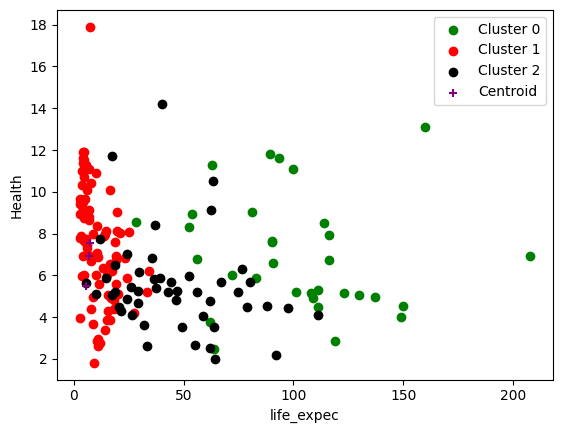

WCSS:  3294.305238871915


In [90]:

## clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['life_expec', 'health']])
y_predicted


data['clusters'] = y_predicted
data

## centroid
km.cluster_centers_



# Our clusters names are 0, 1, and 2
data1 = data[data.clusters == 0]
data2 = data[data.clusters == 1]
data3 = data[data.clusters == 2]

plt.scatter(data1.iloc[:, 1], data1.iloc[:, 3], color='green', label='Cluster 0')
plt.scatter(data2.iloc[:, 1], data2.iloc[:, 3], color='red', label='Cluster 1')
plt.scatter(data3.iloc[:, 1], data3.iloc[:, 3], color='black', label='Cluster 2')

# we put "km" as the KMeans model
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 1], color='purple', marker='+', label='Centroid')
plt.xlabel('life_expec')
plt.ylabel('Health')
plt.legend()
plt.show()

## model evaluation
print('WCSS: ', km.inertia_)

## All features together

In [91]:
data['clusters'] = y_predicted
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,clusters
0,Haiti,208.0,15.3,6.91,64.7,1500,5.450,32.1,3.33,662,0,0
1,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.200,55.0,5.20,399,0,0
2,Chad,150.0,36.8,4.53,43.5,1930,6.390,56.5,6.59,897,0,0
3,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,0,0
4,Mali,137.0,22.8,4.98,35.1,1870,4.370,59.5,6.55,708,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100,1,1
163,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,1
164,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1,1
165,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1,1


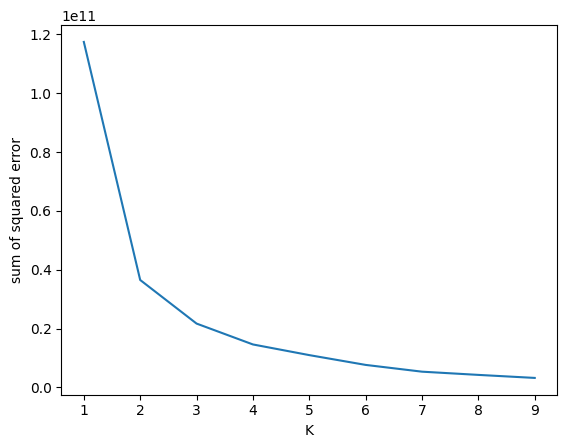

In [92]:

## elbow plot 
elb_plot = []
k_rnge = range(1,10)
for k in k_rnge:
    km = KMeans(n_clusters=k)
    km.fit(data[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])
    elb_plot.append(km.inertia_)
## plot the elbow chart
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rnge,elb_plot)


                      Country  Cluster
0                       Haiti        0
1                Sierra Leone        0
2                        Chad        0
3    Central African Republic        0
4                        Mali        0
..                        ...      ...
162                    Sweden        1
163                   Finland        1
164                Luxembourg        2
165                 Singapore        2
166                   Iceland        1

[167 rows x 2 columns]


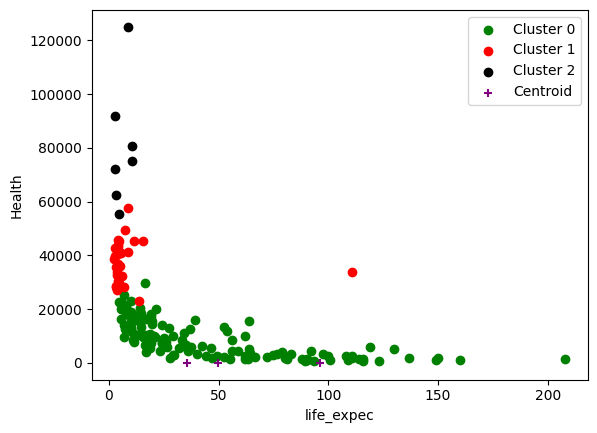

WCSS:  21710210039.754143


In [93]:

## clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[ ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']])
y_predicted


data['clusters'] = y_predicted
data

## centroid
km.cluster_centers_



# Our clusters named 0, 1, and 2
data1 = data[data.clusters == 0]
data2 = data[data.clusters == 1]
data3 = data[data.clusters == 2]

# Create a new DataFrame with cluster assignments
cluster_df = pd.DataFrame({
    'Country': data['country'],
    'Cluster': data['clusters']
})

# Display the cluster assignments for each country
print(cluster_df)


plt.scatter(data1.iloc[:, 1], data1.iloc[:, 5], color='green', label='Cluster 0')
plt.scatter(data2.iloc[:, 1], data2.iloc[:, 5], color='red', label='Cluster 1')
plt.scatter(data3.iloc[:, 1], data3.iloc[:, 5], color='black', label='Cluster 2')

# our model is km
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 1], color='purple', marker='+', label='Centroid')
plt.xlabel('life_expec')
plt.ylabel('Health')
plt.legend()
plt.show()

## model evaluation
print('WCSS: ', km.inertia_)